In [2]:
import os
import json
import pickle
import numpy as np
import pandas as pd

In [3]:
subject_id = 'c2s05'

data_dir = '../data'
subject_dir = os.path.join(data_dir, subject_id)

In [4]:
with open(os.path.join(subject_dir, 'ecg.pkl'), 'rb') as f:
    ecg_df = pickle.load(f)
print(ecg_df.head())

                                                  ecg                 start_t  \
59  [-8.479761122127941, -8.417907249392165, -8.43... 2022-11-28 10:34:00.895   
60  [-31.988616884980303, -33.393613919193115, -34... 2022-11-28 10:34:01.819   
61  [81.63300073021654, 83.76511264501836, 86.7174... 2022-11-28 10:34:02.747   
62  [-185.4418722322144, -186.7096927310369, -187.... 2022-11-28 10:34:03.699   
63  [8.322659033501104, 7.309988233502931, 6.76771... 2022-11-28 10:34:04.583   

                     end_t  glucose  CGM_idx           Timestamp  \
59 2022-11-28 10:34:03.895    114.0  20671.0 2022-11-28 10:34:25   
60 2022-11-28 10:34:04.819    114.0  20671.0 2022-11-28 10:34:25   
61 2022-11-28 10:34:05.747    114.0  20671.0 2022-11-28 10:34:25   
62 2022-11-28 10:34:06.699    114.0  20671.0 2022-11-28 10:34:25   
63 2022-11-28 10:34:07.583    114.0  20671.0 2022-11-28 10:34:25   

    HRConfidence  ECGNoise  
59         100.0  0.000353  
60         100.0  0.000473  
61         100.0 

In [5]:
with open(os.path.join(subject_dir, 'ppg.pkl'), 'rb') as f:
    ppg_df = pickle.load(f)
print(ppg_df.head())

                                                 ppg             start_t  \
0  [-10.718720302362524, -11.370651743800739, -12... 2022-11-28 11:36:24   
1  [333.0466601173821, 281.89613193102855, 230.68... 2022-11-28 11:36:39   
2  [129.68163173821893, 113.26727415569061, 107.4... 2022-11-28 11:36:54   
3  [-31.55349026765098, -16.697704769172283, -0.1... 2022-11-28 11:37:09   
4  [-1.3380117886921798, -2.6177477779183373, -3.... 2022-11-28 11:37:24   

                end_t  glucose  CGM_idx           Timestamp  
0 2022-11-28 11:36:54    106.0  20684.0 2022-11-28 11:39:25  
1 2022-11-28 11:37:09    106.0  20684.0 2022-11-28 11:39:25  
2 2022-11-28 11:37:24    106.0  20684.0 2022-11-28 11:39:25  
3 2022-11-28 11:37:39    106.0  20684.0 2022-11-28 11:39:25  
4 2022-11-28 11:37:54    106.0  20684.0 2022-11-28 11:39:25  


In [6]:
with open(os.path.join(subject_dir, 'eda.pkl'), 'rb') as f:
    eda_df = pickle.load(f)
print(eda_df.head())
print(eda_df['tonic'])

                                              phasic  \
0  [2.533176986427299e-05, 2.5331769864300746e-05...   
0  [0.013865663625681077, 0.011302663625681067, 0...   
0  [0.003317178010010996, 0.0033178048183142295, ...   
0  [0.00015939666980688272, 0.0027221549719704252...   
0  [0.08349026393633514, 0.08477226393633515, 0.0...   

                                               tonic                 start_t  \
0  2022-11-28 11:34:25.250    0.167211
2022-11-28... 2022-11-28 11:34:25.250   
0  2022-11-28 11:39:25.250    0.102742
2022-11-28... 2022-11-28 11:39:25.250   
0  2022-11-28 11:44:25.250    0.129949
2022-11-28... 2022-11-28 11:44:25.250   
0  2022-11-28 11:49:25.250    0.135670
2022-11-28... 2022-11-28 11:49:25.250   
0  2022-11-28 11:54:25.250    0.052339
2022-11-28... 2022-11-28 11:54:25.250   

                end_t                                           segments  \
0 2022-11-28 11:39:25  [(2022-11-28 11:36:24, 2022-11-28 11:39:24.750...   
0 2022-11-28 11:44:25  [(2022-

In [146]:
with open(os.path.join(subject_dir, 'temp.pkl'), 'rb') as f:
    temp_df = pickle.load(f)
print(temp_df.head())

        temp                 start_t                   end_t  glucose  \
0  30.457403 2022-11-28 11:36:24.000 2022-11-28 11:39:24.750    106.0   
0  30.303945 2022-11-28 11:39:25.250 2022-11-28 11:44:24.750    104.0   
0  29.964879 2022-11-28 11:44:25.250 2022-11-28 11:49:24.750    103.0   
0  30.223178 2022-11-28 11:49:25.250 2022-11-28 11:54:24.750    103.0   
0  30.591201 2022-11-28 11:54:25.250 2022-11-28 11:59:24.750    105.0   

   CGM_idx           Timestamp  
0  20684.0 2022-11-28 11:39:25  
0  20685.0 2022-11-28 11:44:25  
0  20686.0 2022-11-28 11:49:25  
0  20687.0 2022-11-28 11:54:25  
0  20688.0 2022-11-28 11:59:25  


In [147]:
ecg_cgm_idx = set(ecg_df['CGM_idx'].unique())
ppg_cgm_idx = set(ppg_df['CGM_idx'].unique())
eda_cgm_idx = set(eda_df['CGM_idx'].unique())
temp_cgm_idx = set(temp_df['CGM_idx'].unique())

/mnt/nvme-data1/mtseng/miniconda3/envs/ecg/lib/python3.11/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


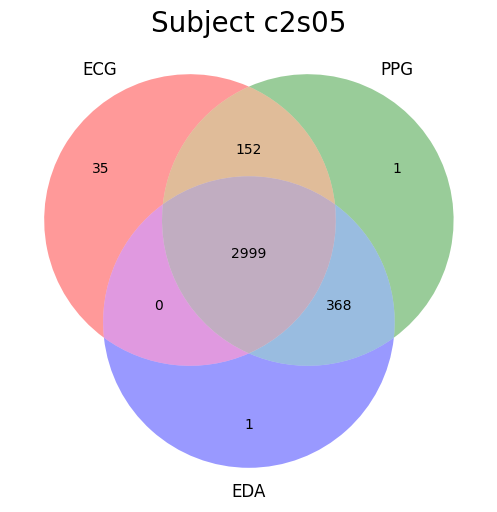

In [148]:
from matplotlib_venn import venn3_unweighted
import matplotlib.pyplot as plt

# Calculate sets
ecg_set = set(ecg_cgm_idx)
ppg_set = set(ppg_cgm_idx)
eda_set = set(eda_cgm_idx)
temp_set = set(temp_cgm_idx)

# Calculate overlaps
only_ecg = len(ecg_set - ppg_set - eda_set)
only_ppg = len(ppg_set - ecg_set - eda_set)
only_eda = len(eda_set - ecg_set - ppg_set)
ecg_and_ppg = len(ecg_set & ppg_set - eda_set)
ecg_and_eda = len(ecg_set & eda_set - ppg_set)
ppg_and_eda = len(ppg_set & eda_set - ecg_set)
all_three = len(ecg_set & ppg_set & eda_set)

# Create the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3_unweighted(
    subsets=(only_ecg, only_ppg, ecg_and_ppg, only_eda, ecg_and_eda, ppg_and_eda, all_three),
    set_labels=("ECG", "PPG", "EDA")
)

# Add title
plt.title("Subject %s" % subject_id)
# Show the plot
plt.show()


In [149]:
shared_cgm_idx = sorted(list(ecg_cgm_idx & ppg_cgm_idx & eda_cgm_idx & temp_cgm_idx))
corresponding_glucose_values = []
for cgm_idx in shared_cgm_idx:
    corresponding_glucose_values.append(ecg_df[ecg_df['CGM_idx'] == cgm_idx]['glucose'].values[0])

shared_cgm_idx = np.array(shared_cgm_idx)
corresponding_glucose_values = np.array(corresponding_glucose_values)
print("Number of shared CGM indices: {:d} / {:d} ({:.2f}%)".format(len(shared_cgm_idx), len(ecg_cgm_idx), len(shared_cgm_idx) / len(ecg_cgm_idx) * 100))

Number of shared CGM indices: 2999 / 3186 (94.13%)


In [150]:
hypo_indices = shared_cgm_idx[np.where(corresponding_glucose_values < 70)]
normal_indices = shared_cgm_idx[np.where((corresponding_glucose_values >= 70) & (corresponding_glucose_values <= 180))]

print("Number of hypoglycemic indices: ", len(hypo_indices))
print("Number of normal indices: ", len(normal_indices))

Number of hypoglycemic indices:  230
Number of normal indices:  2769


In [151]:
out_json_path = os.path.join(subject_dir, 'metadata.json')

if os.path.exists(out_json_path):
    print("Loading folds...")
    with open(out_json_path, 'r') as f:
        folds = json.load(f)
else:
    print("Creating folds...")
    # five fold cross validation
    np.random.seed(0)
    np.random.shuffle(hypo_indices)
    np.random.shuffle(normal_indices)

    n_folds = 5
    hypo_start = np.arange(0, len(hypo_indices), len(hypo_indices) // n_folds)
    normal_start = np.arange(0, len(normal_indices), len(normal_indices) // n_folds)

    folds = {}
    for i in range(n_folds):
        hypo_fold = hypo_indices[hypo_start[i]:hypo_start[i] + len(hypo_indices) // n_folds]
        normal_fold = normal_indices[normal_start[i]:normal_start[i] + len(normal_indices) // n_folds]
        val_fold = np.concatenate([hypo_fold, normal_fold])
        train_fold = np.concatenate([hypo_indices, normal_indices])
        train_fold = np.setdiff1d(train_fold, val_fold)
        folds[f"v{i+1}"] = {
            "train": list(train_fold),
            "val": list(val_fold)
        }

    for i, key in enumerate(folds):
        print(folds[key]['val'])
        print("Fold ", key, " Train size: ", len(folds[key]['train']), " Val size: ", len(folds[key]['val']))

    with open(out_json_path, 'w') as f:
        json.dump(folds, f, indent=4)

Loading folds...


In [152]:
# check if contain CGM index that is not in the shared CGM index
for fold in folds.values():
    for key, indices in fold.items():
        for idx in indices:
            if idx not in shared_cgm_idx:
                print(f"Error: {idx} not in shared CGM index")

## Demo Data Splitting

In [153]:
version = 'v1'
train_df = eda_df[eda_df['CGM_idx'].isin(folds[version]['train'])].copy()
val_df = eda_df[eda_df['CGM_idx'].isin(folds[version]['val'])].copy()

train_df['Date'] = train_df['Timestamp'].dt.date
val_df['Date'] = val_df['Timestamp'].dt.date

In [154]:
dates = sorted(set(list(train_df['Date'].unique()) + list(val_df['Date'].unique())))
print(len(dates))

16


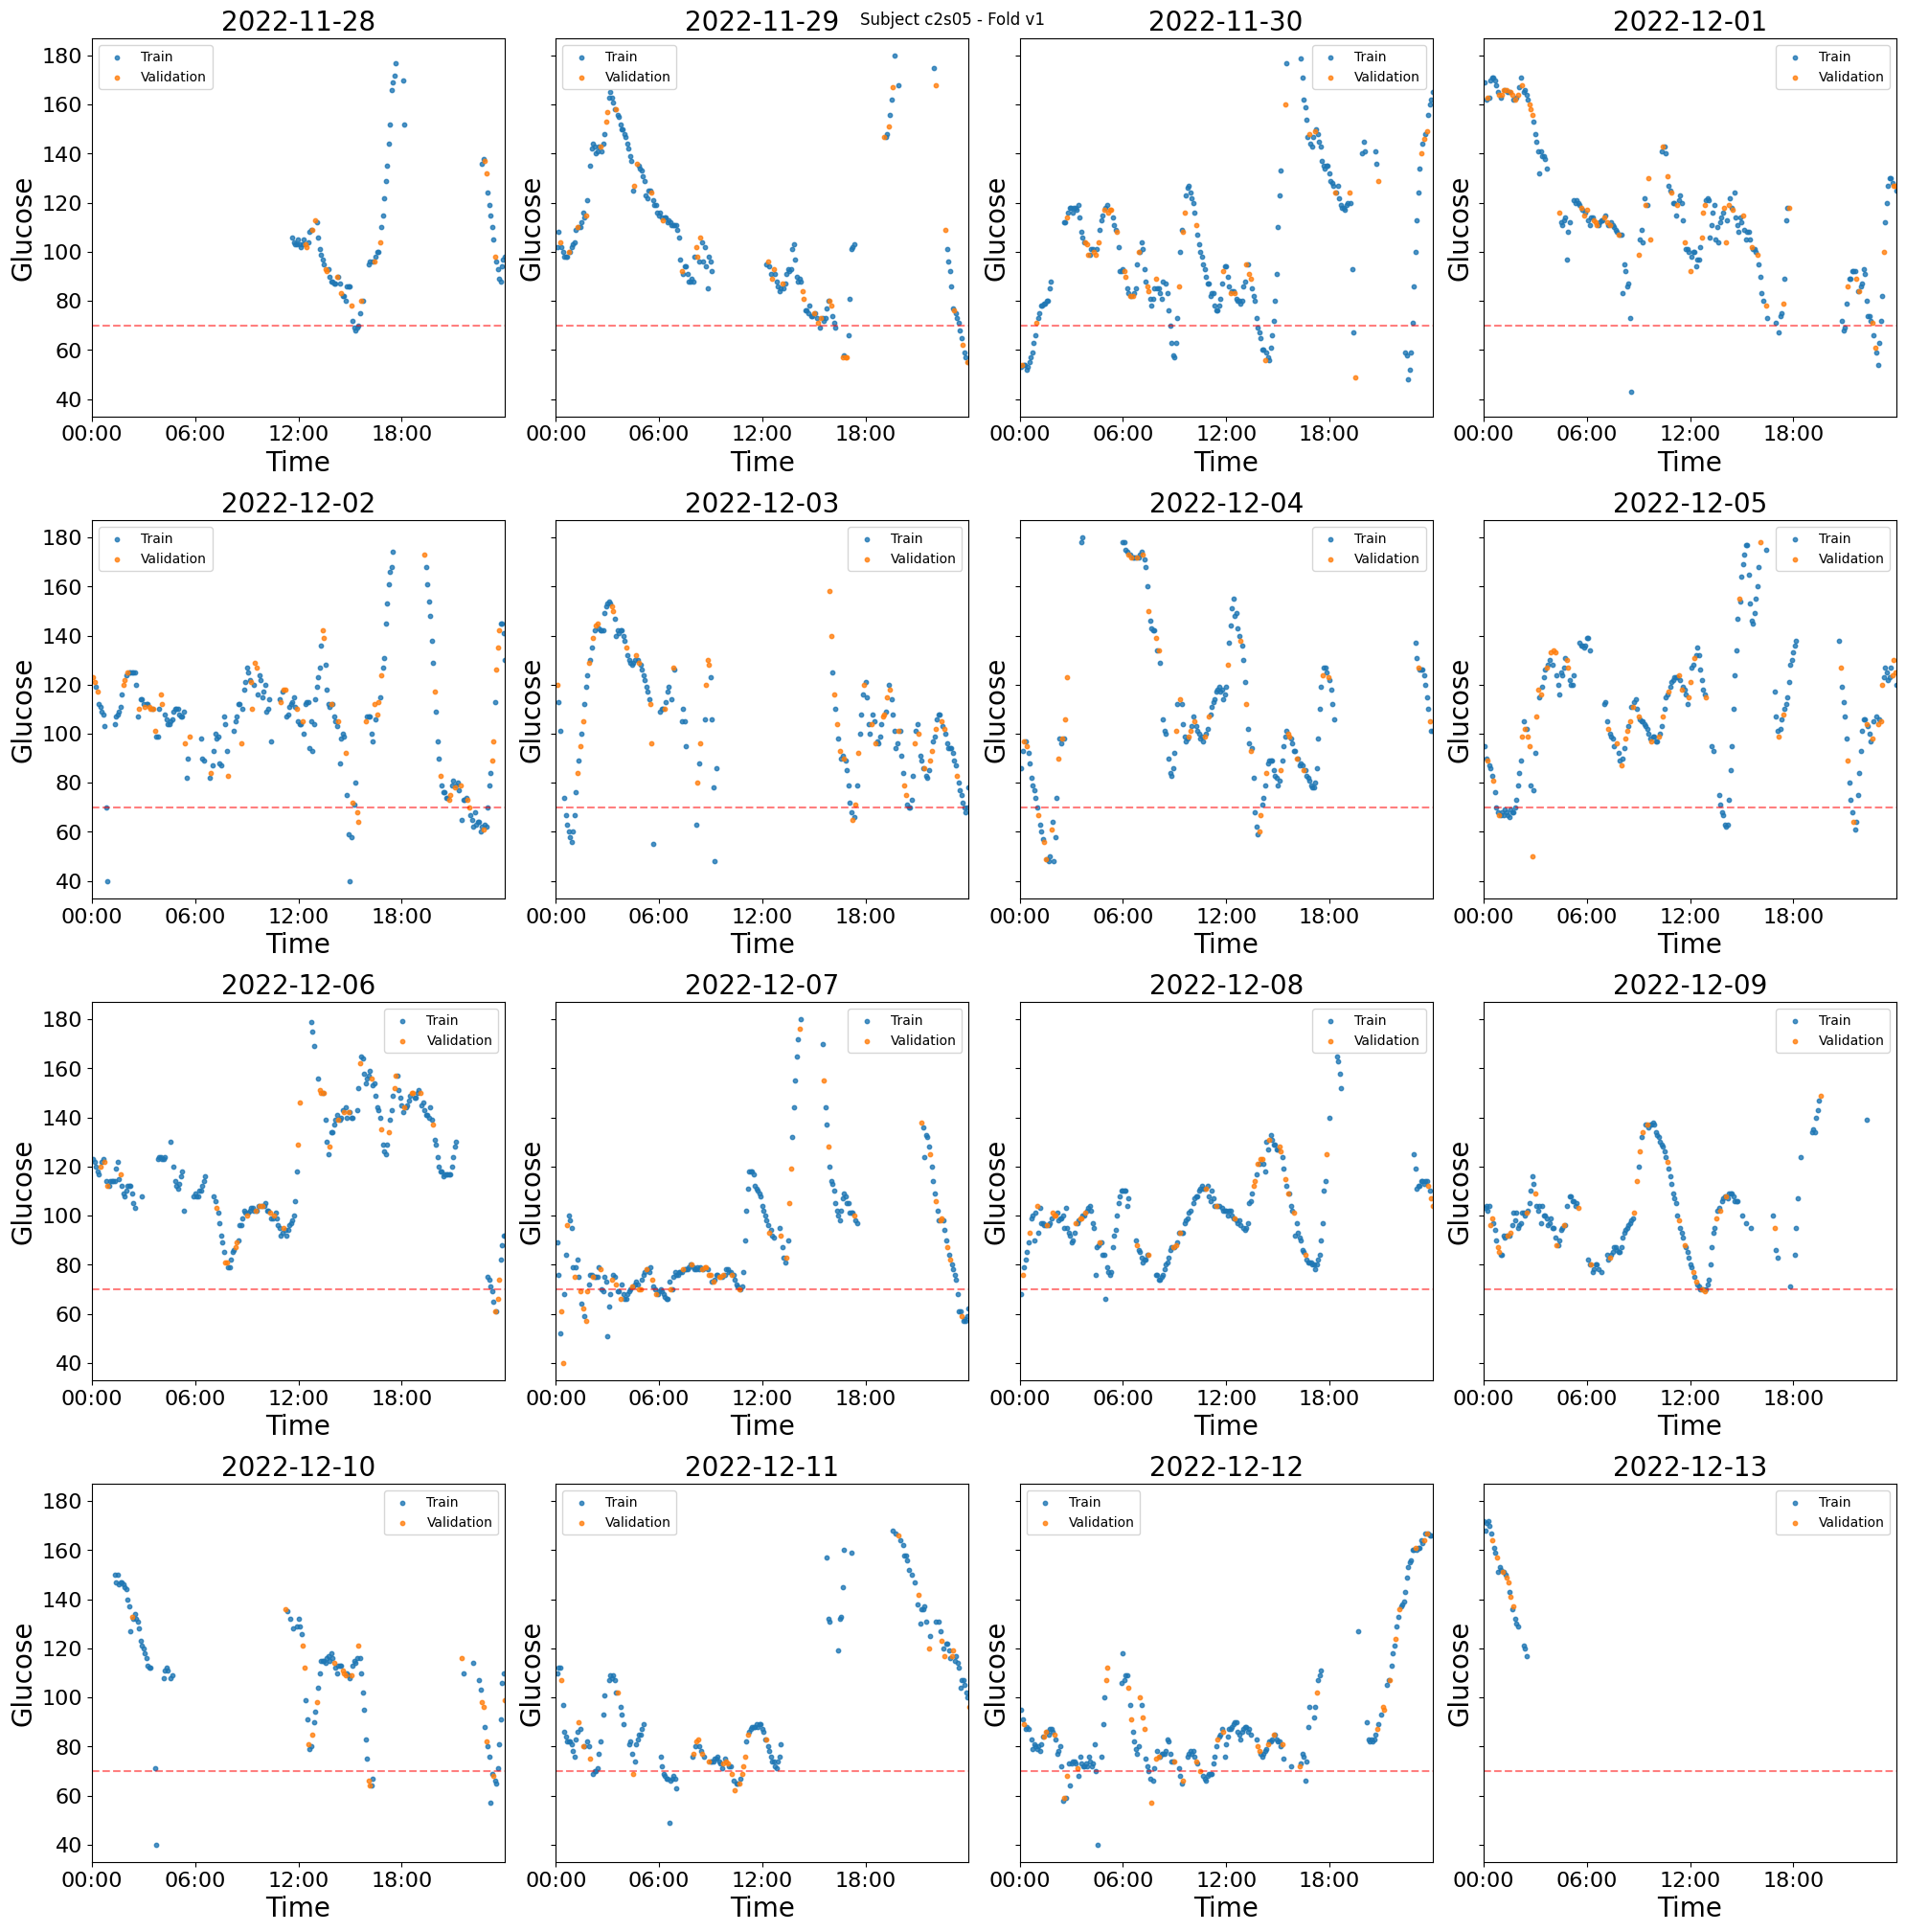

In [155]:
n_cols = 4
n_rows = len(dates) // n_cols + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), sharey=True)
plt.rcParams.update({'xtick.labelsize': 16, 'ytick.labelsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20})

for i, date in enumerate(dates):
    ax = axs.flatten()[i]
    train_day = train_df[train_df['Date'] == date]
    val_day = val_df[val_df['Date'] == date]

    # Plot for each date
    ax.scatter(train_day['Timestamp'], train_day['glucose'], label='Train', marker='o', alpha=0.8, s=10)
    ax.scatter(val_day['Timestamp'], val_day['glucose'], label='Validation', marker='o', alpha=0.8, s=10)

    ax.set_title(date)
    ax.set_xlabel('Time')
    
    # span from 0 to 24 hours
    # Format x-axis to show time only (0:00 to 23:59)
    ax.set_xlim(pd.Timestamp(f"{date} 00:00"), pd.Timestamp(f"{date} 23:59"))

    # Format x-axis to show time only (0:00 to 23:59)
    ax.set_xticks(pd.date_range(start=f'{date} 00:00', end=f'{date} 23:59', freq='6H'))
    ax.set_xticklabels([t.strftime('%H:%M') for t in pd.date_range(start=f'{date} 00:00', end=f'{date} 23:59', freq='6H')])

    # Horizontal line for reference
    ax.hlines(y=70, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='r', linestyle='--', alpha=0.5)

    ax.set_ylabel('Glucose')
    ax.legend()

# Remove unused subplots
for j in range(i + 1, len(axs.flatten())):
    fig.delaxes(axs.flatten()[j])

# Adjust layout
plt.suptitle(f'Subject {subject_id} - Fold {version}')
plt.tight_layout()
plt.show()